In [1]:
import numpy as np
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
import cx_Oracle
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('ch_food_n_acc_1st_orders.dsv', sep=';', low_memory=False)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294883 entries, 0 to 294882
Data columns (total 27 columns):
SCM_N_ORDER_POS_NR              294883 non-null int64
SCM_N_ORDER_NR                  294883 non-null int64
TDT_T_KEY_ORDER_DATE            294883 non-null object
THR_C_KEY_ORDER_HOUR            294883 non-null object
SIT_N_KEY_SITE                  294883 non-null int64
CUS_N_KEY_CUSTOMER              294883 non-null int64
SCM_SALES_BMF                   294883 non-null object
SCM_SALES_CANCEL_BMF            294883 non-null object
SCM_D_FINANCE_CM1               294883 non-null object
SCM_D_FINANCE_CM2               294883 non-null object
SCM_D_ORIG_FINANCE_ORDER_NET    294883 non-null object
SCM_AP_ID                       294883 non-null int64
SCM_AS_ID                       294883 non-null int64
SCM_MASTER_AP_ID                294883 non-null int64
SCM_IS_ZSP_ORDER                294883 non-null int64
SCM_C_ORDER_STATUS              294883 non-null object
CTP_N_KEY_CUSTOME

In [4]:
data['ORDER_DATETIME'] = pd.to_datetime(data['TDT_T_KEY_ORDER_DATE'] + ' ' + data['THR_C_KEY_ORDER_HOUR'] + ':00', 
                                        format="%d/%m/%y %H:%M:%S")

In [5]:
data['TDT_T_KEY_ORDER_DATE'] = pd.to_datetime(data['TDT_T_KEY_ORDER_DATE'], format="%d/%m/%y")

In [6]:
lista = [float(str(i).replace(',','.')) for i in data['SCM_SALES_BMF'].values]
data['SCM_SALES_BMF'] = lista

In [7]:
lista0 = [float(str(i).replace(',','.')) for i in data['SCM_D_ORIG_FINANCE_ORDER_NET'].values]
data['SCM_D_ORIG_FINANCE_ORDER_NET'] = lista0

In [8]:
lista1 = [float(str(i).replace(',','.')) for i in data['SCM_SALES_CANCEL_BMF'].values]
data['SCM_SALES_CANCEL_BMF'] = lista1

In [9]:
lista2 = [float(str(i).replace(',','.')) for i in data['SCM_D_FINANCE_CM1'].values]
data['SCM_D_FINANCE_CM1'] = lista2

In [10]:
lista3 = [float(str(i).replace(',','.')) for i in data['SCM_D_FINANCE_CM2'].values]
data['SCM_D_FINANCE_CM2'] = lista3

In [11]:
data['FINANCE_ORDER_NET'] = data['SCM_D_ORIG_FINANCE_ORDER_NET'].groupby(data['SCM_N_ORDER_NR']).transform('sum')

In [12]:
data['REL_CM1'] = data['SCM_D_FINANCE_CM1'] / data['FINANCE_ORDER_NET'] * 100

In [13]:
data['REL_CM2'] = data['SCM_D_FINANCE_CM2'] / data['FINANCE_ORDER_NET'] * 100

In [14]:
# let's convert inf and -inf into NA so that they are excluded when calculating the mean
data['REL_CM2'] = data['REL_CM2'].replace(np.inf, np.nan).replace(-np.inf, np.nan)

In [15]:
#Convert date to calendar week number and month number
data['WEEK_NUMBER'] = data['TDT_T_KEY_ORDER_DATE'].dt.week
data['MONTH_NUMBER'] = data['TDT_T_KEY_ORDER_DATE'].dt.month

Let's get PG3 & PG4 short_link names from our DB to make data more readable...

In [16]:
pg3_l = list(data['OSP_3_LEAD_P_PG_ID'].fillna(0).unique())

In [17]:
pg3_list = repr(pg3_l).replace('[','(').replace(']',')')

In [18]:
query = """select pg_id, pg_shortlink from ZOOMAN.PRODUCT_GROUPS
where pg_id in %s""" % pg3_list

In [19]:
conn = cx_Oracle.connect('zooor', 'zoo12or', 'zoorep', threaded=True, encoding = "UTF-8", nencoding = "UTF-8")
curs = conn.cursor()
pg3 = pd.read_sql(query, con = conn)
conn.close()

In [20]:
pg3['PG_SHORTLINK_ID'] = pg3['PG_SHORTLINK'] + '_' + pg3['PG_ID'].astype(str)

In [21]:
len(set(pg3['PG_ID'])), len(set(pg3['PG_SHORTLINK_ID']))

(52, 52)

In [22]:
pg3

,PG_ID,PG_SHORTLINK,PG_SHORTLINK_ID
0,9,hundebett,hundebett_9
1,15,hundeleine_hundehalsband,hundeleine_hundehalsband_15
2,16,fressnapf,fressnapf_16
3,18,hundesnacks,hundesnacks_18
4,20,hundespielzeug,hundespielzeug_20
5,23,kratzbaum_katzenbaum,kratzbaum_katzenbaum_23
6,29,katzentoilette,katzentoilette_29
7,33,fressnapf,fressnapf_33
8,34,katzensnacks,katzensnacks_34
9,36,katzenspielzeug,katzenspielzeug_36


In [23]:
pg3_dict = {key: value for (key, value) in zip(pg3['PG_ID'], pg3['PG_SHORTLINK_ID'])}

In [24]:
pg3_dict[0] = 'null'

In [25]:
lista_pg3 = [pg3_dict[i] for i in data['OSP_3_LEAD_P_PG_ID'].fillna(0)]

In [26]:
len(lista_pg3), len(data['OSP_3_LEAD_P_PG_ID'])

(294883, 294883)

In [27]:
data['LEAD_PG3_NAME'] = lista_pg3

In [28]:
pg4_l = list(data['OSP_4_LEAD_P_PG_ID'].fillna(0).unique())

In [29]:
pg4_list = repr(pg4_l).replace('[','(').replace(']',')')

In [30]:
query = """select pg_id, pg_shortlink from ZOOMAN.PRODUCT_GROUPS
where pg_id in %s""" % pg4_list

In [31]:
conn = cx_Oracle.connect('zooor', 'zoo12or', 'zoorep', threaded=True, encoding = "UTF-8", nencoding = "UTF-8")
curs = conn.cursor()
pg4 = pd.read_sql(query, con = conn)
conn.close()

In [32]:
pg4_dict = {key: value for (key, value) in zip(pg4['PG_ID'], pg4['PG_SHORTLINK'])}

In [33]:
pg4_dict[-1] = 'null'

In [34]:
lista_pg4 = [pg4_dict[i] for i in data['OSP_4_LEAD_P_PG_ID'].fillna(-1)]

In [35]:
len(lista_pg4), len(data['OSP_4_LEAD_P_PG_ID'])

(294883, 294883)

In [36]:
data['LEAD_PG4_NAME'] = lista_pg4

In [37]:
data[['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME']].sample(5)

,OSP_3_LEAD_P_PG_ID,LEAD_PG3_NAME,OSP_4_LEAD_P_PG_ID,LEAD_PG4_NAME
99309,2068,katzenfutter_dose_2068,2085,yarrah
264587,2068,katzenfutter_dose_2068,11751,applaws_katzenfutter
82215,221,vogelfutter_221,1343,papagei
143407,2068,katzenfutter_dose_2068,9498,sheba
217098,2068,katzenfutter_dose_2068,720,hills


In [38]:
first_orders = data[data['OSP_KO_COUNT_NET'] == 1]

In [39]:
cus_pg3_1st = {}

for i in first_orders['CUS_N_KEY_CUSTOMER'].unique():
    cus_data = first_orders[first_orders['CUS_N_KEY_CUSTOMER'] == i]
    cus_pg3_1st[i] = cus_data['LEAD_PG3_NAME'].iloc[0]

In [40]:
cus_pg3_1st

{16977855: 'hundespielzeug_20',
 16970245: 'sport_training_153317',
 16978741: 'katzenfutter_dose_2068',
 16974947: 'kratzbaum_katzenbaum_23',
 16975351: 'katzensnacks_34',
 16971357: 'hundepflege_409',
 16978692: 'hundetransportbox_2190',
 16969621: 'hundefutter_trockenfutter_251',
 16968960: 'hundehuette_hundetuer_2192',
 16973267: 'fressnapf_33',
 16974417: 'katzenspielzeug_36',
 16977658: 'hundepflege_409',
 16974220: 'hundefutter_nassfutter_857',
 17031846: 'kratzbaum_katzenbaum_23',
 17066288: 'hundetransportbox_2190',
 17066076: 'katzenfutter_trockenfutter_252',
 17001267: 'kratzbaum_katzenbaum_23',
 17066914: 'freigehege_49828',
 17001924: 'katzenfutter_dose_2068',
 17061675: 'hundetransportbox_2190',
 16990600: 'kratzbaum_katzenbaum_23',
 17062984: 'katzentoilette_29',
 17000618: 'hundebett_9',
 17047617: 'hundespielzeug_20',
 17039243: 'kratzbaum_katzenbaum_23',
 16980134: 'katzenfutter_trockenfutter_252',
 17027829: 'katzenfutter_dose_2068',
 16983658: 'balkon_garten_2155',


In [41]:
cus_pg3_1st_list = [cus_pg3_1st[i] for i in data['CUS_N_KEY_CUSTOMER'].values]

In [42]:
len(data['CUS_N_KEY_CUSTOMER']) == len(cus_pg3_1st_list)

True

In [43]:
data['LEAD_PG3_1ST_ORD'] = cus_pg3_1st_list

In [44]:
cm2_pg3_to_pg4 = data.groupby(['SCM_N_ORDER_NR', 'TDT_T_KEY_ORDER_DATE', 'CUS_N_KEY_CUSTOMER', 
                                   'OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME', 
                                   'LEAD_PG3_1ST_ORD'], as_index=False).agg({'SCM_D_FINANCE_CM2': 'sum',
                                                                        'OSP_KO_COUNT_NET': 'mean',
                                                                            'REL_CM2': 'sum',
                                                                            'SCM_D_ORIG_FINANCE_ORDER_NET':'sum'})

In [45]:
cm2_pg3_to_pg4.sample(10)

,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,CUS_N_KEY_CUSTOMER,OSP_3_LEAD_P_PG_ID,LEAD_PG3_NAME,OSP_4_LEAD_P_PG_ID,LEAD_PG4_NAME,LEAD_PG3_1ST_ORD,SCM_D_FINANCE_CM2,OSP_KO_COUNT_NET,REL_CM2,SCM_D_ORIG_FINANCE_ORDER_NET
54141,105703975,2018-03-01,18224711,2068,katzenfutter_dose_2068,1520,happy_cat,katzenfutter_dose_2068,17.1376,3,32.936338,52.0325
37531,99658410,2017-12-02,18715459,2190,hundetransportbox_2190,10623,hundezubehoer_auto,hundetransportbox_2190,49.0687,1,36.653801,133.8707
14777,93870008,2017-09-06,9805521,252,katzenfutter_trockenfutter_252,42545,purina_one,hundepflege_409,16.6941,3,23.072777,72.3541
62831,112273714,2018-06-07,18692582,2068,katzenfutter_dose_2068,10331,tigerino,katzenstreu_301,24.1153,4,36.201332,66.6144
4850,90489162,2017-07-10,17284521,2190,hundetransportbox_2190,10618,hundetransportbox,hundetransportbox_2190,15.3429,1,30.592859,50.1519
57168,107670519,2018-03-29,18570409,251,hundefutter_trockenfutter_251,2108,luposan,hundefutter_trockenfutter_251,24.3462,4,17.479764,139.2822
55696,106679025,2018-03-15,18418099,29,katzentoilette_29,39925,exklusive_katzentoilette,katzenfutter_trockenfutter_252,25.0010,4,29.738313,84.0700
41164,100525160,2017-12-13,18832964,23,kratzbaum_katzenbaum_23,1070,kratzbaum_klein,kratzbaum_katzenbaum_23,16.9395,1,26.764257,63.2915
55922,106826038,2018-03-18,18698742,251,hundefutter_trockenfutter_251,2108,luposan,hundefutter_trockenfutter_251,9.2056,3,11.141732,82.6227
3641,90005271,2017-07-02,17209023,23,kratzbaum_katzenbaum_23,2060,kratzbaum_mittel,kratzbaum_katzenbaum_23,33.8966,1,37.555771,90.2567


In [46]:
cm2_pg3_to_pg4['LEAD_PG3_1ST_ORD'].unique()

array(['balkon_garten_2155', 'katzenspielzeug_36',
       'hundehuette_hundetuer_2192', 'katzenfutter_trockenfutter_252',
       'fressnapf_33', 'hundefutter_trockenfutter_251',
       'katzenfutter_dose_2068', 'hundespielzeug_20',
       'katzenbetten_katzenkissen_1540', 'katzentoilette_29',
       'sport_training_153317', 'hundebett_9', 'katzenstreu_301',
       'hundetransportbox_2190', 'hundefutter_nassfutter_857',
       'kratzbaum_katzenbaum_23', 'hundepflege_409', 'freigehege_49828',
       'katzensnacks_34', 'futter_45', 'hundesnacks_18',
       'hundefutter_ergaenzung_1400', 'transport_37',
       'hundeleine_hundehalsband_15', 'fressnapf_16', 'spielzeug_47',
       'futter_ergaenzung_401', 'heu_streu_305',
       'katzenfutter_ergaenzung_38', 'hundebekleidung_hundemantel_40023',
       'spielzeug_1603', 'ungezieferschutz_207553', 'superbox_dog_255413'],
      dtype=object)

In [47]:
crosstab_ko_count_net = pd.crosstab(cm2_pg3_to_pg4['LEAD_PG3_1ST_ORD'], cm2_pg3_to_pg4['OSP_KO_COUNT_NET'], 
                                           values = cm2_pg3_to_pg4['SCM_N_ORDER_NR'],
                                          aggfunc='count').fillna(0).astype(int)

In [48]:
crosstab_ko_count_net

OSP_KO_COUNT_NET,1,2,3,4,5
LEAD_PG3_1ST_ORD,,,,,
balkon_garten_2155,2477,706,375,253,178
freigehege_49828,198,66,40,25,14
fressnapf_16,130,53,30,23,19
fressnapf_33,1426,538,313,220,155
futter_45,129,66,38,21,13
futter_ergaenzung_401,55,32,17,10,10
heu_streu_305,105,55,41,25,14
hundebekleidung_hundemantel_40023,275,85,42,25,19
hundebett_9,1543,640,371,248,174


In [49]:
next_orders = cm2_pg3_to_pg4[cm2_pg3_to_pg4['OSP_KO_COUNT_NET'] != 1]

In [50]:
crosstab_pg3_to_pg4_orders = pd.crosstab(next_orders['LEAD_PG3_1ST_ORD'], next_orders['LEAD_PG4_NAME'], 
                                           values = next_orders['SCM_N_ORDER_NR'],
                                          aggfunc='count').fillna(0).astype(int).apply(lambda x: x/x.sum() * 100, axis=1).round(2)

In [51]:
crosstab_pg3_to_pg4_orders

LEAD_PG4_NAME,acana,agility,alle_zubehoerartikel,almo_nature,almo_nature_holistic,almo_nature_labels,alpha_spirit,animonda,animonda_rafine,animonda_rafinee,...,wuerste_fleischbaellchen,yarrah,zahnpflege_snacks,zimmerkaefig,zooplus,zooplus_bio,zooplus_branded,zooplus_classic,zooplus_geschenkgutschein,zwergkaninchen
LEAD_PG3_1ST_ORD,,,,,,,,,,,,,,,,,,,,,
balkon_garten_2155,0.13,0.00,0.00,0.86,0.07,0.07,0.00,0.53,0.93,0.00,...,0.00,0.86,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.33
freigehege_49828,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.52
fressnapf_16,0.80,0.00,0.00,0.00,0.00,0.00,0.00,0.80,0.00,0.80,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
fressnapf_33,0.16,0.08,0.00,1.79,0.33,0.00,0.00,0.73,1.14,0.00,...,0.00,0.08,0.08,0.00,0.00,0.00,0.00,0.00,0.08,0.24
futter_45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.72,25.36
futter_ergaenzung_401,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.45
heu_streu_305,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.67
hundebekleidung_hundemantel_40023,0.00,0.58,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.75,0.00,0.58,1.17,0.00,0.00,0.00,0.00
hundebett_9,0.56,0.35,0.00,0.42,0.07,0.00,0.00,0.63,0.35,0.00,...,0.21,0.21,0.91,0.00,0.07,0.00,0.00,0.00,0.07,0.14


In [52]:
crosstab_pg3_to_pg4_orders.columns.ravel()

array(['acana', 'agility', 'alle_zubehoerartikel', 'almo_nature',
       'almo_nature_holistic', 'almo_nature_labels', 'alpha_spirit',
       'animonda', 'animonda_rafine', 'animonda_rafinee',
       'antizug_maulkorb', 'applaws', 'applaws_katzenfutter',
       'aquarium_filter', 'aquarium_zubehoer', 'aufbau_leistung_zucht',
       'aussergewoehnliche_katzenbetten', 'autoschondecken',
       'autoschutzgitter', 'bade_sand', 'badehaeuser', 'baelle',
       'baldrian_katzenspielzeug', 'barkoo_kausnacks',
       'beaphar_spezialdiaet', 'belcando', 'benek', 'beschaeftigung',
       'betten', 'beyond_katzen', 'biokats', 'biskuits_kekse',
       'bodengrund', 'bosch', 'briantos', 'bruecken_treppen', 'buersten',
       'canis_natural', 'cat_and_clean', 'catessy', 'catnip_spielzeug',
       'cats_best', 'catsan', 'catz_finefood', 'cellulose_einstreu',
       'cesar', 'chinchilla', 'clicker_pfeife', 'co3',
       'concept_for_life_cat', 'concept_for_life_dog',
       'concept_for_life_katzennas

In [53]:
pg4_selection = [i for i in crosstab_pg3_to_pg4_orders.columns if (crosstab_pg3_to_pg4_orders[i] > 5).any()]

In [54]:
len(pg4_selection)

60

In [55]:
np.array(pg4_selection)

array(['cats_best', 'catz_finefood', 'cellulose_einstreu', 'degu',
       'einbautueren', 'erziehungshalsband', 'eukanuba',
       'extreme_classic', 'felix', 'flocken_mischfutter', 'freisitz',
       'funktionsleine', 'futterautomaten', 'futterpflanzen',
       'gefriergetrocknete_snacks', 'gelenke_knochen',
       'gesundheits_betten', 'gourmet', 'grosssittich', 'handtuecher',
       'hanfstreu', 'haut_haare', 'herrmanns_hundefutter', 'heu',
       'hills_prescription_diet', 'holzstreu',
       'hundefutter_wolf_of_wilderness', 'hundemantel', 'josera',
       'katzenklappe_und_einbautuer', 'katzenmilch', 'katzentraenke',
       'kauknochen', 'kaustreifen', 'knabberspass_und_knabberstangen',
       'knuspersnacks', 'litterlocker_litterchamp', 'meerschweinchen',
       'metall', 'pasten_cremes', 'purizon', 'ratte', 'rinti',
       'royal_canin', 'royal_canin_breed', 'royal_canin_breed_cat',
       'royal_canin_katzenfutter', 'royal_canin_size',
       'royal_canin_veterinary_diet',
   

In [56]:
crosstab_pg3_to_pg4_orders[pg4_selection]

LEAD_PG4_NAME,cats_best,catz_finefood,cellulose_einstreu,degu,einbautueren,erziehungshalsband,eukanuba,extreme_classic,felix,flocken_mischfutter,...,schermaschine,schlafhaeuschen,schwimmen,strohstreu,terra_canis,toilette,vitamine,wellensittich,zahnpflege_snacks,zwergkaninchen
LEAD_PG3_1ST_ORD,,,,,,,,,,,,,,,,,,,,,
balkon_garten_2155,1.19,0.99,0.00,0.13,0.40,0.07,0.00,0.86,5.82,0.00,...,0.07,0.07,0.13,0.00,0.00,0.13,0.13,0.07,0.07,0.33
freigehege_49828,0.69,1.38,2.07,0.00,2.76,0.00,0.00,0.00,0.00,0.00,...,0.00,3.45,2.07,1.38,3.45,2.07,0.00,0.00,0.00,5.52
fressnapf_16,0.00,2.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.80,...,0.00,0.00,1.60,0.00,1.60,2.40,0.80,0.00,0.00,0.00
fressnapf_33,1.47,2.20,0.00,0.00,0.08,0.24,0.08,0.65,4.24,0.00,...,0.24,0.00,0.08,0.00,0.00,0.08,0.08,0.00,0.08,0.24
futter_45,0.72,0.00,0.72,8.70,0.00,0.00,0.00,0.00,1.45,0.00,...,0.00,1.45,0.72,0.72,0.00,0.72,0.00,0.00,0.00,25.36
futter_ergaenzung_401,1.45,0.00,1.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.45,13.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.45
heu_streu_305,0.00,0.00,10.37,0.00,0.74,0.00,0.00,0.00,0.74,0.00,...,0.00,1.48,0.00,5.93,0.74,0.00,0.00,0.00,0.00,6.67
hundebekleidung_hundemantel_40023,0.00,0.00,0.00,0.00,1.17,0.58,0.58,0.00,0.00,0.00,...,1.17,0.00,0.58,0.00,1.17,0.00,0.00,0.00,1.75,0.00
hundebett_9,0.00,0.35,0.00,0.07,0.49,0.70,1.67,0.14,1.47,0.21,...,0.56,0.07,1.05,0.00,1.05,1.05,0.00,0.00,0.91,0.14


In [57]:
crosstab_pg3_to_pg4_orders[pg4_selection].to_csv('ch_rel_orders_lead_pg3_and_pg4_selection.csv', sep=';', index=True, encoding='utf-8')

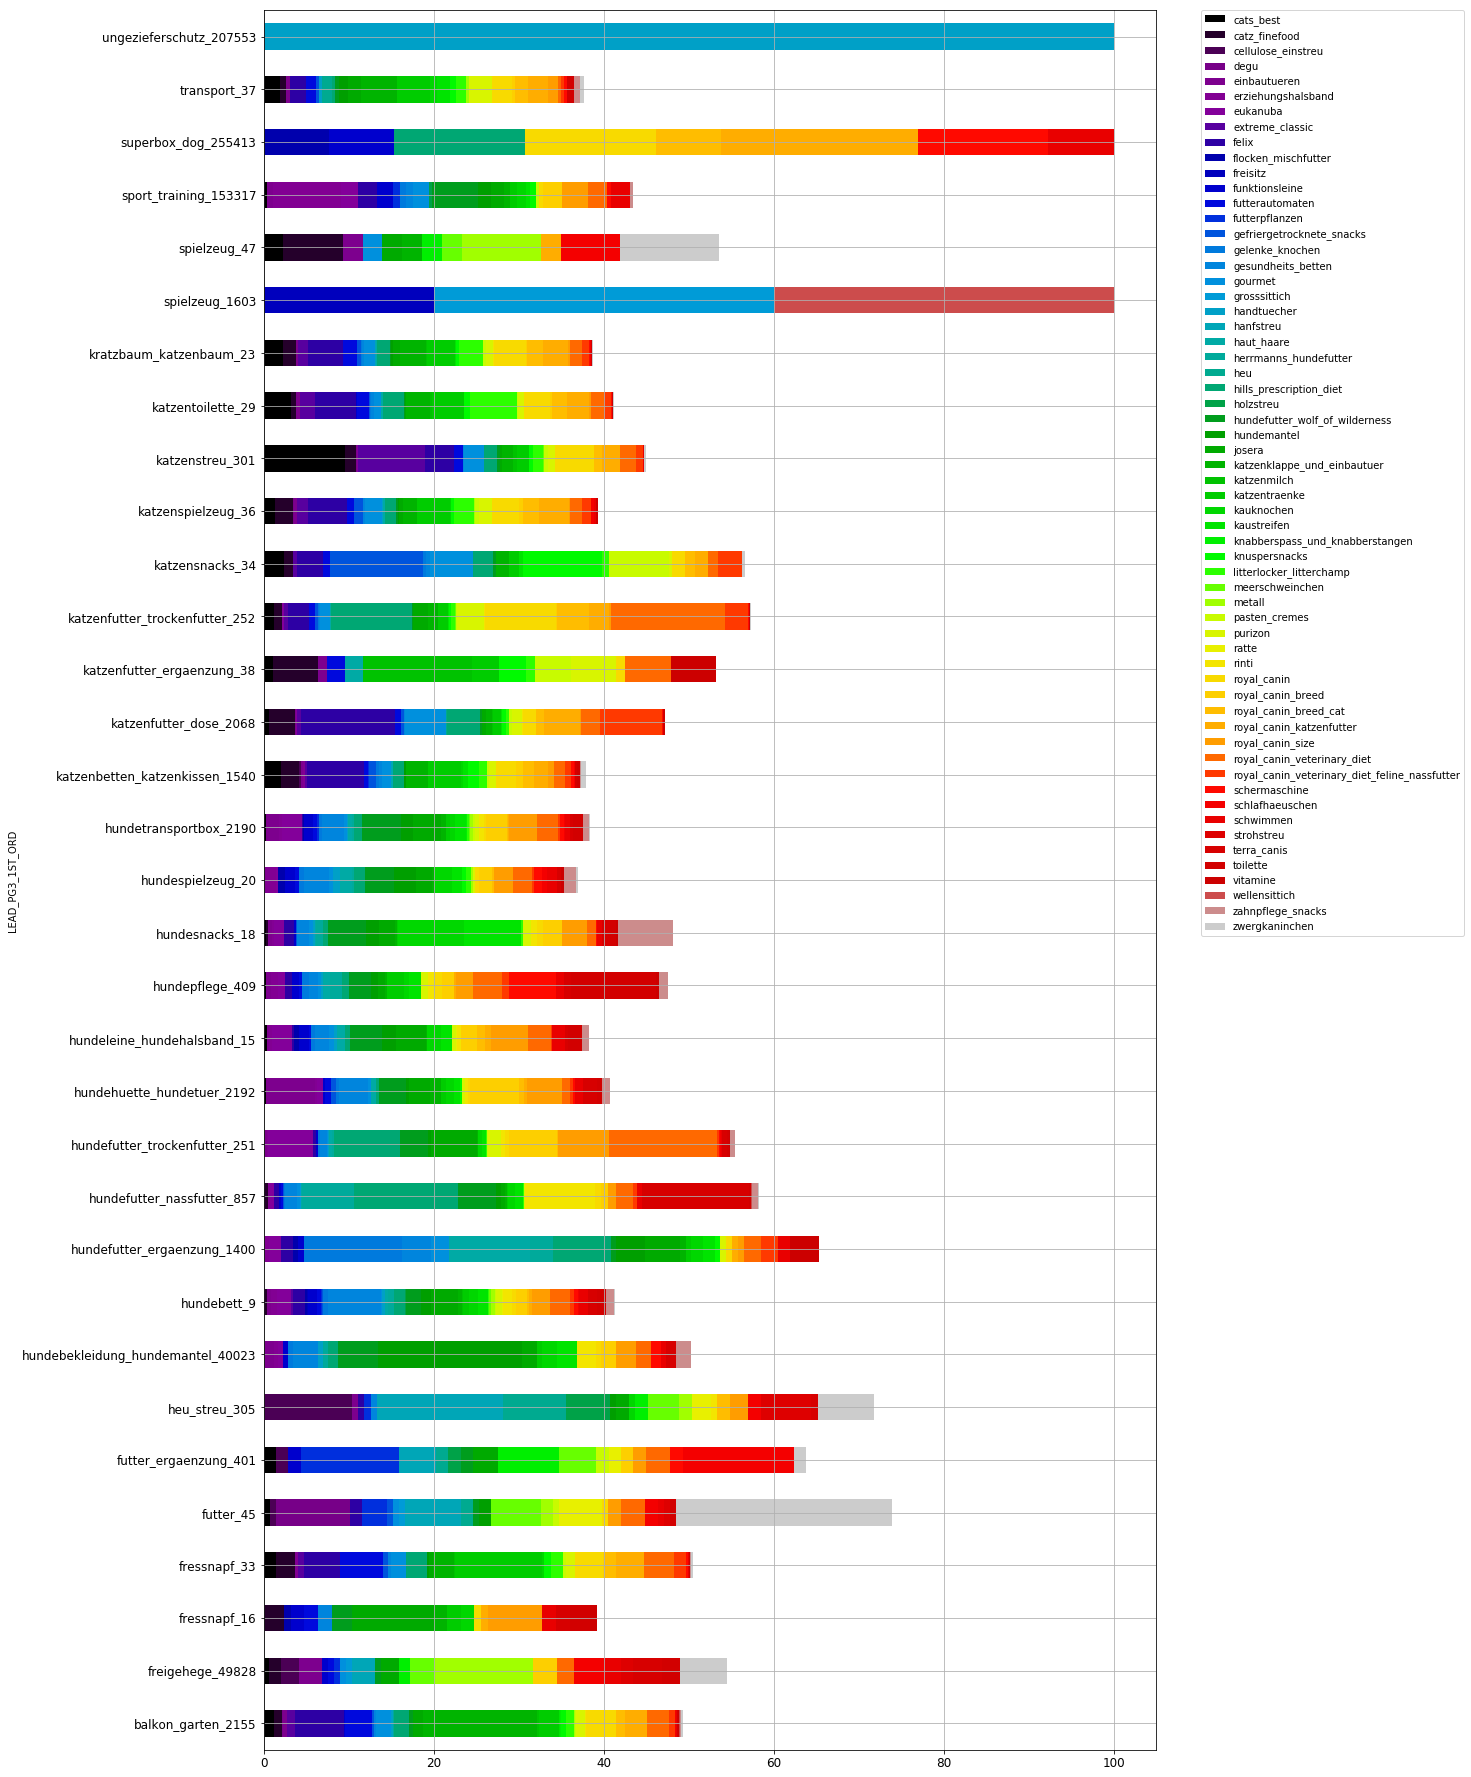

In [58]:
crosstab_pg3_to_pg4_orders[pg4_selection].plot(kind='barh', stacked=True, figsize=(16, 32), grid=True, fontsize=12, colormap='nipy_spectral')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.tight_layout()
#plt.savefig('rel_orders_accesories_and_pg4_sel')

In [59]:
crosstab_pg3_to_pg4_cm2 = pd.crosstab(cm2_pg3_to_pg4['LEAD_PG3_1ST_ORD'], cm2_pg3_to_pg4['OSP_KO_COUNT_NET'], 
                                           values = cm2_pg3_to_pg4['SCM_D_FINANCE_CM2'],
                                          aggfunc='sum').fillna(0).round(2)

In [60]:
crosstab_pg3_to_pg4_cm2

OSP_KO_COUNT_NET,1,2,3,4,5
LEAD_PG3_1ST_ORD,,,,,
balkon_garten_2155,57839.73,14521.21,8436.63,5409.44,4034.78
freigehege_49828,5833.72,1783.15,1083.43,521.45,341.69
fressnapf_16,2489.59,1306.38,737.33,618.76,505.22
fressnapf_33,38385.24,12317.55,7288.79,4874.02,3721.33
futter_45,2495.42,1135.80,906.43,491.84,372.36
futter_ergaenzung_401,1000.20,609.99,404.64,189.80,267.61
heu_streu_305,2824.54,1281.32,993.90,606.50,361.59
hundebekleidung_hundemantel_40023,6368.91,1708.34,1005.62,464.24,340.94
hundebett_9,38599.17,16081.28,10001.15,6529.88,4678.97


In [61]:
crosstab_pg3_to_pg4_perc_cm2 = pd.crosstab(next_orders['LEAD_PG3_1ST_ORD'], next_orders['LEAD_PG4_NAME'], 
                                           values = next_orders['SCM_D_FINANCE_CM2'],
                                          aggfunc='sum').fillna(0).astype(int).apply(lambda x: x/x.sum() * 100, axis=1).round(2)

In [62]:
crosstab_pg3_to_pg4_perc_cm2

LEAD_PG4_NAME,acana,agility,alle_zubehoerartikel,almo_nature,almo_nature_holistic,almo_nature_labels,alpha_spirit,animonda,animonda_rafine,animonda_rafinee,...,wuerste_fleischbaellchen,yarrah,zahnpflege_snacks,zimmerkaefig,zooplus,zooplus_bio,zooplus_branded,zooplus_classic,zooplus_geschenkgutschein,zwergkaninchen
LEAD_PG3_1ST_ORD,,,,,,,,,,,,,,,,,,,,,
balkon_garten_2155,0.08,0.00,0.00,0.54,0.01,0.03,0.00,0.71,0.75,0.00,...,0.00,1.26,0.09,0.00,0.00,0.00,0.00,0.00,0.00,0.27
freigehege_49828,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.41
fressnapf_16,0.38,0.00,0.00,0.00,0.00,0.00,0.00,0.38,0.00,0.57,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
fressnapf_33,0.11,0.14,0.00,1.45,0.24,0.00,0.00,0.58,0.55,0.00,...,0.00,0.07,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.20
futter_45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.35,23.37
futter_ergaenzung_401,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.51
heu_streu_305,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.26
hundebekleidung_hundemantel_40023,0.00,2.49,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,2.67,0.00,0.60,1.32,0.00,0.00,0.00,0.00
hundebett_9,0.57,0.52,0.00,0.21,0.06,0.00,0.00,0.88,0.52,0.00,...,0.11,0.24,0.49,0.00,0.08,0.00,0.00,0.00,0.00,0.12


In [63]:
crosstab_pg3_to_pg4_perc_cm2.columns.ravel()

array(['acana', 'agility', 'alle_zubehoerartikel', 'almo_nature',
       'almo_nature_holistic', 'almo_nature_labels', 'alpha_spirit',
       'animonda', 'animonda_rafine', 'animonda_rafinee',
       'antizug_maulkorb', 'applaws', 'applaws_katzenfutter',
       'aquarium_filter', 'aquarium_zubehoer', 'aufbau_leistung_zucht',
       'aussergewoehnliche_katzenbetten', 'autoschondecken',
       'autoschutzgitter', 'bade_sand', 'badehaeuser', 'baelle',
       'baldrian_katzenspielzeug', 'barkoo_kausnacks',
       'beaphar_spezialdiaet', 'belcando', 'benek', 'beschaeftigung',
       'betten', 'beyond_katzen', 'biokats', 'biskuits_kekse',
       'bodengrund', 'bosch', 'briantos', 'bruecken_treppen', 'buersten',
       'canis_natural', 'cat_and_clean', 'catessy', 'catnip_spielzeug',
       'cats_best', 'catsan', 'catz_finefood', 'cellulose_einstreu',
       'cesar', 'chinchilla', 'clicker_pfeife', 'co3',
       'concept_for_life_cat', 'concept_for_life_dog',
       'concept_for_life_katzennas

In [64]:
pg4_cm2_selection = [i for i in crosstab_pg3_to_pg4_perc_cm2.columns if (crosstab_pg3_to_pg4_perc_cm2[i] > 5).any()]

In [65]:
len(pg4_cm2_selection)

58

In [66]:
crosstab_pg3_to_pg4_perc_cm2[pg4_cm2_selection]

LEAD_PG4_NAME,applaws_katzenfutter,cats_best,cellulose_einstreu,decken,degu,einbautueren,erziehungshalsband,fahrradanhaenger,faltbare_hundebox,felix,...,royal_canin_veterinary_diet_feline_nassfutter,schermaschine,schlafhaeuschen,schwimmen,sheba,terra_canis,toilette,wellensittich,yarrah,zwergkaninchen
LEAD_PG3_1ST_ORD,,,,,,,,,,,,,,,,,,,,,
balkon_garten_2155,2.65,1.01,0.00,0.20,0.06,0.72,0.06,0.00,0.35,3.00,...,0.49,0.11,0.10,0.18,1.23,0.00,0.12,0.11,1.26,0.27
freigehege_49828,0.00,0.30,1.95,0.00,0.00,3.11,0.00,0.00,2.81,0.00,...,0.00,0.00,3.27,4.00,0.00,1.62,1.30,0.00,0.00,3.41
fressnapf_16,0.00,0.00,0.00,0.73,0.00,0.00,0.00,0.00,2.36,0.00,...,0.00,0.00,0.00,2.33,0.00,0.86,1.82,0.00,0.00,0.00
fressnapf_33,3.22,0.76,0.00,0.18,0.00,0.09,0.55,0.00,0.20,3.07,...,1.05,0.36,0.00,0.13,1.07,0.00,0.10,0.00,0.07,0.20
futter_45,0.00,0.28,0.90,0.00,8.15,0.00,0.00,0.00,0.00,2.08,...,0.00,0.00,1.66,0.87,0.00,0.00,0.69,0.00,0.00,23.37
futter_ergaenzung_401,0.00,1.38,2.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,3.99,9.42,0.00,0.00,0.00,0.00,0.00,0.00,1.51
heu_streu_305,0.00,0.00,9.46,0.28,0.00,0.00,0.00,0.00,0.00,0.78,...,0.00,0.00,1.15,0.00,2.67,0.37,0.00,0.00,0.00,11.26
hundebekleidung_hundemantel_40023,0.00,0.00,0.00,0.00,0.00,3.33,1.32,0.00,1.49,0.00,...,0.00,1.09,0.00,0.95,0.00,1.23,0.00,0.00,0.00,0.00
hundebett_9,0.34,0.00,0.00,2.26,0.05,0.64,0.62,0.59,1.50,0.78,...,0.51,0.57,0.08,1.47,0.24,0.87,1.81,0.00,0.24,0.12


In [67]:
crosstab_pg3_to_pg4_perc_cm2[pg4_cm2_selection].to_csv('ch_rel_cm2_lead_pg3_and_pg4_selection.csv', sep=';',
                                                      index=True, encoding='utf-8')

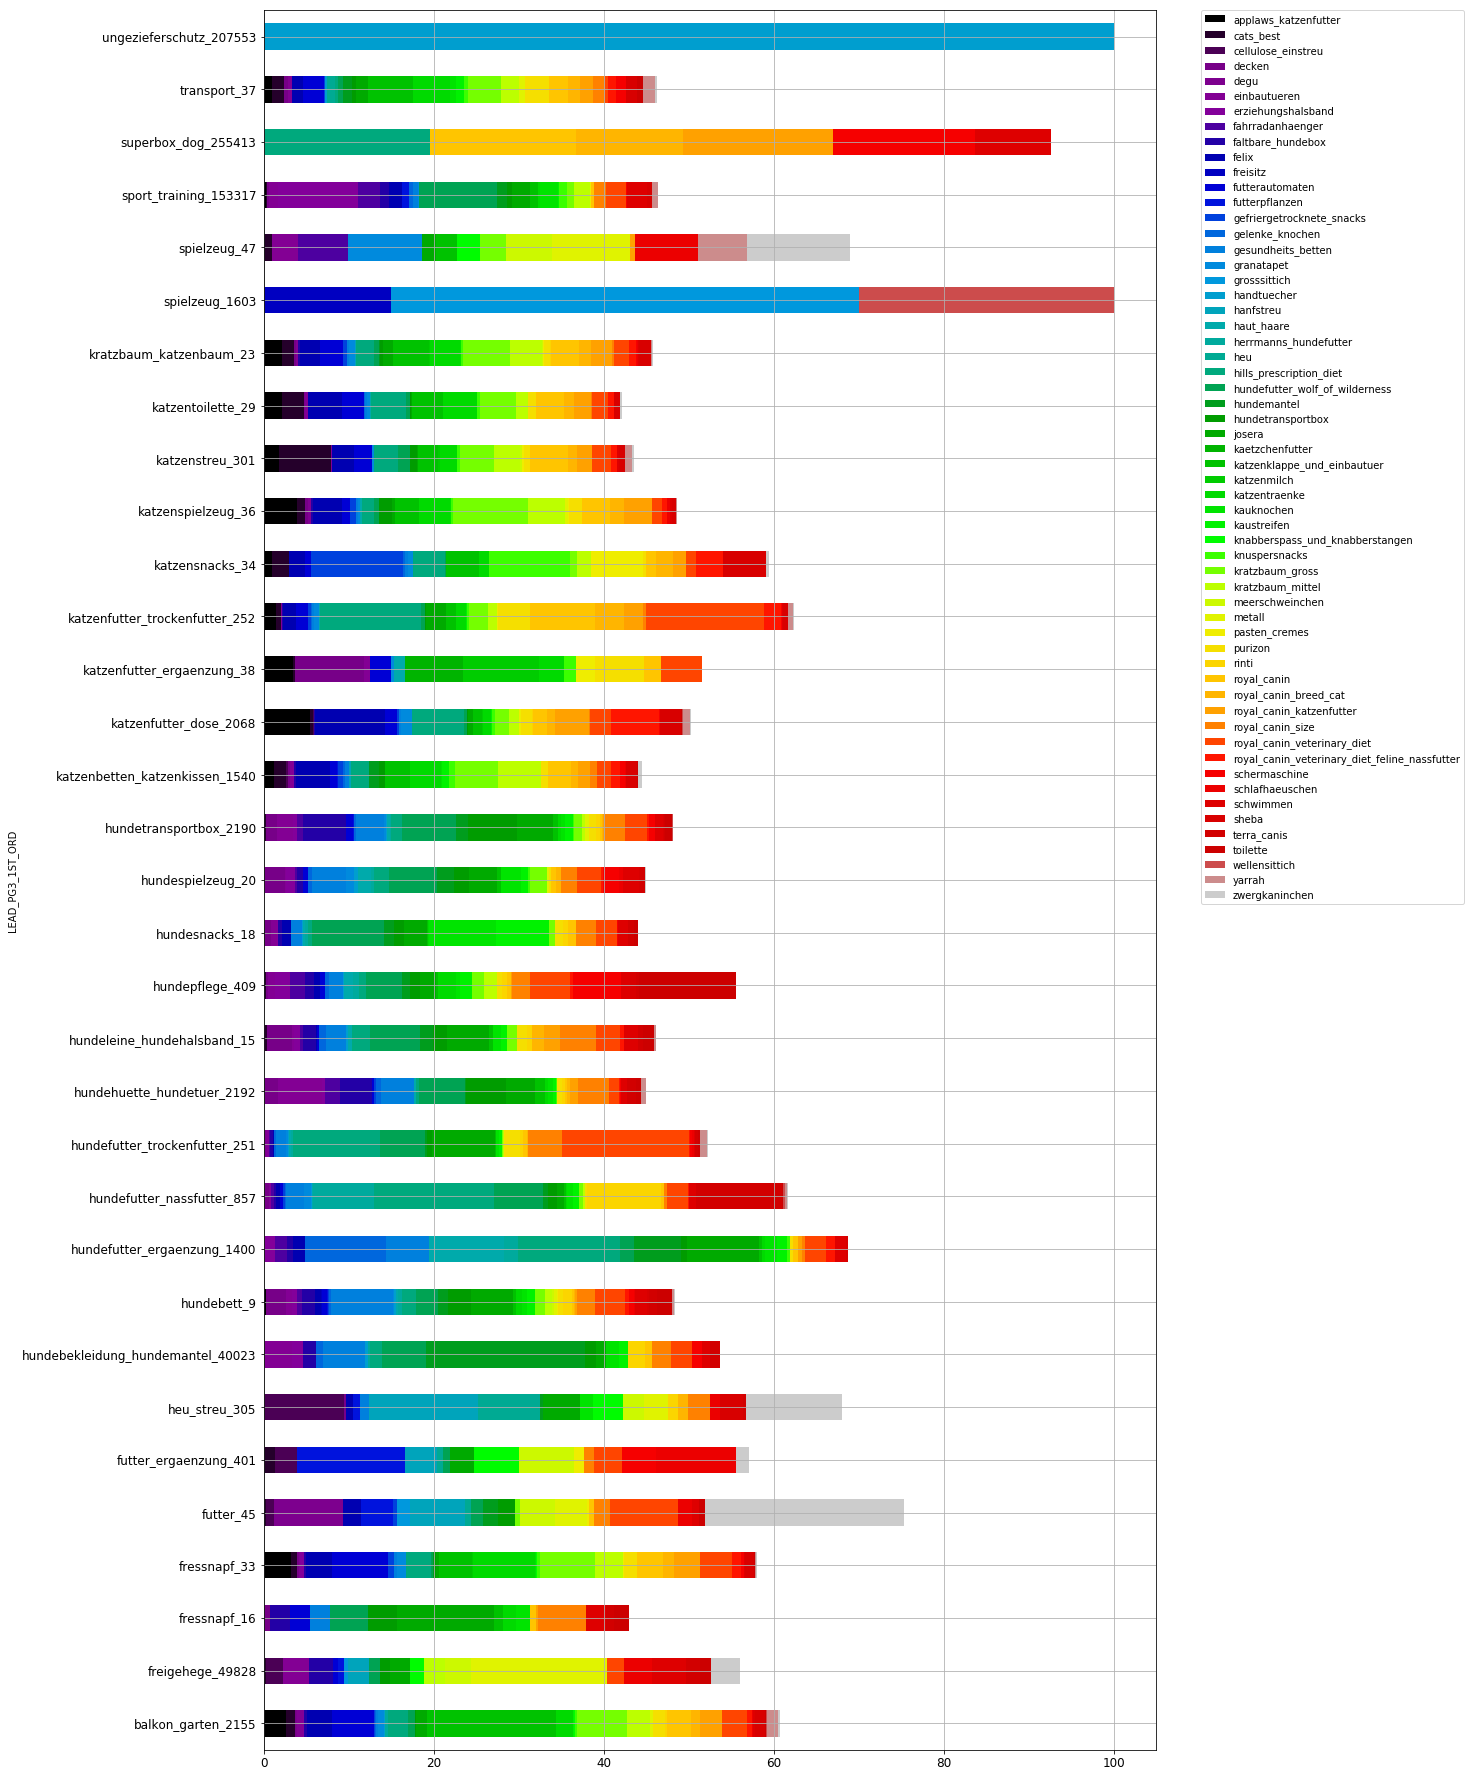

In [68]:
crosstab_pg3_to_pg4_perc_cm2[crosstab_pg3_to_pg4_perc_cm2.index != 'geschenkgutscheine_17947'][pg4_cm2_selection]\
.plot(kind='barh', stacked=True, figsize=(16, 32), grid=True, fontsize=12, colormap='nipy_spectral')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [69]:
cm2_pg3_to_pg4.sample(10)

,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,CUS_N_KEY_CUSTOMER,OSP_3_LEAD_P_PG_ID,LEAD_PG3_NAME,OSP_4_LEAD_P_PG_ID,LEAD_PG4_NAME,LEAD_PG3_1ST_ORD,SCM_D_FINANCE_CM2,OSP_KO_COUNT_NET,REL_CM2,SCM_D_ORIG_FINANCE_ORDER_NET
59660,109448719,2018-04-25,18788918,252,katzenfutter_trockenfutter_252,683,royal_canin,katzentoilette_29,53.7271,3,39.497089,136.0280
22534,96051930,2017-10-10,17605708,2068,katzenfutter_dose_2068,39209,hills_prescription_diet,katzenfutter_dose_2068,11.1521,2,25.929508,43.0093
38879,99989934,2017-12-06,18654697,23,kratzbaum_katzenbaum_23,1070,kratzbaum_klein,kratzbaum_katzenbaum_23,43.4895,2,31.159767,139.5694
4772,90461482,2017-07-10,17280028,153317,sport_training_153317,153271,agility,sport_training_153317,100.5627,1,41.578253,241.8637
14597,93813446,2017-09-05,17820152,2190,hundetransportbox_2190,10618,hundetransportbox,hundetransportbox_2190,36.3303,1,25.142198,144.4993
58166,108350620,2018-04-09,18085356,301,katzenstreu_301,10331,tigerino,katzentoilette_29,13.3082,3,27.620459,48.1824
31239,98198921,2017-11-12,18418024,23,kratzbaum_katzenbaum_23,2061,kratzbaum_gross,kratzbaum_katzenbaum_23,29.8753,1,37.332785,80.0243
51637,104349236,2018-02-09,18091613,251,hundefutter_trockenfutter_251,81396,royal_canin_veterinary_diet,hundefutter_trockenfutter_251,29.6914,3,35.161720,84.4424
209,88348780,2017-06-03,16984263,2190,hundetransportbox_2190,15017,faltbare_hundebox,hundetransportbox_2190,6.4455,1,17.246639,37.3725
43875,101147130,2017-12-23,17876947,252,katzenfutter_trockenfutter_252,683,royal_canin,katzenfutter_trockenfutter_252,7.6139,3,15.229353,49.9949


In [70]:
cm2_pg3_to_pg4['REL_CM2'].describe()

count    6.397800e+04
mean     1.535094e+13
std      3.882847e+15
min     -2.780890e+07
25%      2.211310e+01
50%      2.909965e+01
75%      3.582418e+01
max      9.821225e+17
Name: REL_CM2, dtype: float64

As we have some orders with net_sales = 0, CM2% becames extremely high or low and can lead us into trouble when calculating the CM2% on average per Lead PG4

In [71]:
cm2_pg3_to_pg4_subset = cm2_pg3_to_pg4[cm2_pg3_to_pg4['SCM_D_ORIG_FINANCE_ORDER_NET'] >= 1]

In [72]:
next_orders_subset = cm2_pg3_to_pg4_subset[cm2_pg3_to_pg4_subset['OSP_KO_COUNT_NET'] != 1]

In [73]:
pg3_orders_count_net_cm2 = pd.crosstab(cm2_pg3_to_pg4_subset['LEAD_PG3_1ST_ORD'], cm2_pg3_to_pg4_subset['OSP_KO_COUNT_NET'], 
                                           values = cm2_pg3_to_pg4_subset['REL_CM2'],
                                          aggfunc='mean').fillna(0).round(2)

In [74]:
pg3_orders_count_net_cm2

OSP_KO_COUNT_NET,1,2,3,4,5
LEAD_PG3_1ST_ORD,,,,,
balkon_garten_2155,27.06,27.13,25.71,26.06,25.98
freigehege_49828,38.69,32.45,36.49,32.47,30.12
fressnapf_16,37.50,35.65,31.58,32.80,31.30
fressnapf_33,32.91,28.10,28.70,27.07,27.59
futter_45,32.98,29.38,31.21,37.39,-35.10
futter_ergaenzung_401,35.01,35.70,33.57,33.45,34.15
heu_streu_305,38.32,34.61,33.84,34.06,38.34
hundebekleidung_hundemantel_40023,47.50,35.33,35.37,30.65,32.73
hundebett_9,33.32,33.33,32.84,30.76,31.23


In [75]:
crosstab_pg3_to_pg4_rel_cm2 = pd.crosstab(next_orders_subset['LEAD_PG3_1ST_ORD'], next_orders_subset['LEAD_PG4_NAME'], 
                                           values = next_orders_subset['REL_CM2'],
                                          aggfunc='mean').fillna(0).round(2)

In [76]:
crosstab_pg3_to_pg4_rel_cm2

LEAD_PG4_NAME,acana,agility,alle_zubehoerartikel,almo_nature,almo_nature_holistic,almo_nature_labels,alpha_spirit,animonda,animonda_rafine,animonda_rafinee,...,wuerste_fleischbaellchen,yarrah,zahnpflege_snacks,zimmerkaefig,zooplus,zooplus_bio,zooplus_branded,zooplus_classic,zooplus_geschenkgutschein,zwergkaninchen
LEAD_PG3_1ST_ORD,,,,,,,,,,,,,,,,,,,,,
balkon_garten_2155,29.20,0.00,0.00,14.85,9.25,19.56,0.00,28.82,22.49,0.00,...,0.00,20.69,45.35,0.00,0.00,0.00,0.00,0.00,0.00,34.28
freigehege_49828,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-7.37
fressnapf_16,28.83,0.00,0.00,0.00,0.00,0.00,0.00,24.47,0.00,25.60,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
fressnapf_33,31.69,50.07,0.00,19.87,27.06,0.00,0.00,31.41,13.09,0.00,...,0.00,28.62,31.92,0.00,0.00,0.00,0.00,0.00,0.00,32.75
futter_45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,79.36,29.73
futter_ergaenzung_401,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,44.02
heu_streu_305,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,37.50
hundebekleidung_hundemantel_40023,0.00,50.82,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,36.75,0.00,30.06,35.53,0.00,0.00,0.00,0.00
hundebett_9,23.10,47.32,0.00,17.97,33.56,0.00,0.00,28.84,32.29,0.00,...,28.87,27.48,28.18,0.00,37.87,0.00,0.00,0.00,0.00,29.37


In [77]:
crosstab_pg3_to_pg4_rel_cm2.columns.ravel()

array(['acana', 'agility', 'alle_zubehoerartikel', 'almo_nature',
       'almo_nature_holistic', 'almo_nature_labels', 'alpha_spirit',
       'animonda', 'animonda_rafine', 'animonda_rafinee',
       'antizug_maulkorb', 'applaws', 'applaws_katzenfutter',
       'aquarium_filter', 'aquarium_zubehoer', 'aufbau_leistung_zucht',
       'aussergewoehnliche_katzenbetten', 'autoschondecken',
       'autoschutzgitter', 'bade_sand', 'badehaeuser', 'baelle',
       'baldrian_katzenspielzeug', 'barkoo_kausnacks',
       'beaphar_spezialdiaet', 'belcando', 'benek', 'beschaeftigung',
       'betten', 'beyond_katzen', 'biokats', 'biskuits_kekse',
       'bodengrund', 'bosch', 'briantos', 'bruecken_treppen', 'buersten',
       'canis_natural', 'cat_and_clean', 'catessy', 'catnip_spielzeug',
       'cats_best', 'catsan', 'catz_finefood', 'cellulose_einstreu',
       'cesar', 'chinchilla', 'clicker_pfeife', 'co3',
       'concept_for_life_cat', 'concept_for_life_dog',
       'concept_for_life_katzennas

In [78]:
pg4_rel_cm2_selection = [i for i in crosstab_pg3_to_pg4_rel_cm2.columns if (crosstab_pg3_to_pg4_rel_cm2[i] < 0).any()]

In [79]:
len(pg4_rel_cm2_selection)

34

In [80]:
np.array(pg4_rel_cm2_selection)

array(['aussergewoehnliche_katzenbetten', 'bade_sand', 'baelle',
       'baldrian_katzenspielzeug', 'buersten', 'cat_and_clean',
       'drops_leckerli', 'earthborn', 'edelstahl', 'futterbeutel_dummy',
       'happy_dog_premium', 'haubentoiletten', 'hundepullover_mode',
       'kamm_buerste', 'katzenspielzeug_intelligenz', 'knabberhoelzer',
       'kratzmoebel_wellpappe', 'kratzspielzeug', 'laufraeder',
       'leonardo', 'maus_gerbil', 'napfstaender', 'napfunterlagen',
       'nylonleinen', 'perfect_fit', 'purina_one',
       'purina_veterinary_diets_cat_wet', 'schalentoiletten',
       'schaufeln_vorleger', 'smilla', 'spielangeln', 'traenken',
       'ungezieferschutz', 'zwergkaninchen'], dtype='<U31')

In [81]:
pd.options.display.float_format = '{:.2f}'.format
crosstab_pg3_to_pg4_rel_cm2[pg4_rel_cm2_selection]

LEAD_PG4_NAME,aussergewoehnliche_katzenbetten,bade_sand,baelle,baldrian_katzenspielzeug,buersten,cat_and_clean,drops_leckerli,earthborn,edelstahl,futterbeutel_dummy,...,perfect_fit,purina_one,purina_veterinary_diets_cat_wet,schalentoiletten,schaufeln_vorleger,smilla,spielangeln,traenken,ungezieferschutz,zwergkaninchen
LEAD_PG3_1ST_ORD,,,,,,,,,,,,,,,,,,,,,
balkon_garten_2155,28.42,0.00,0.00,0.00,24.64,18.80,0.00,0.00,28.35,0.00,...,24.82,17.58,0.00,25.79,0.00,0.00,26.00,0.00,21.80,34.28
freigehege_49828,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,41.12,0.00,0.00,0.00,0.00,0.00,0.00,22.18,-7.37
fressnapf_16,0.00,0.00,0.00,0.00,0.00,20.06,0.00,0.00,52.99,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
fressnapf_33,40.94,0.00,0.00,0.00,21.88,0.00,0.00,0.00,0.00,0.00,...,0.00,17.93,0.00,-5.29,28.36,34.97,42.72,-80.91,0.00,32.75
futter_45,44.56,41.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.43,29.73
futter_ergaenzung_401,0.00,41.93,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,44.02
heu_streu_305,0.00,26.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,37.50
hundebekleidung_hundemantel_40023,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,42.43,31.04,...,0.00,20.87,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
hundebett_9,0.00,0.00,38.64,0.00,19.96,-3.74,29.90,0.00,43.81,35.07,...,0.00,32.37,0.00,39.21,31.62,0.00,40.77,0.00,29.21,29.37


In [82]:
crosstab_pg3_to_pg4_rel_cm2[pg4_rel_cm2_selection].to_csv('ch_relative_cm2_lead_pg3_and_pg4_selection.csv',
                                                          sep=';', index=True, encoding='utf-8')

In [83]:
pd.crosstab(next_orders_subset['LEAD_PG3_1ST_ORD'], next_orders_subset['LEAD_PG4_NAME'], 
                                           values = next_orders_subset['REL_CM2'],
                                          aggfunc=[len, np.mean]).fillna(0).round(2).reorder_levels([1, 0], axis=1).sort_index(axis=1)

LEAD_PG4_NAME                      acana       agility        \
                                     len  mean     len  mean   
LEAD_PG3_1ST_ORD                                               
balkon_garten_2155                  2.00 29.20    0.00  0.00   
freigehege_49828                    0.00  0.00    0.00  0.00   
fressnapf_16                        1.00 28.83    0.00  0.00   
fressnapf_33                        2.00 31.69    1.00 50.07   
futter_45                           0.00  0.00    0.00  0.00   
futter_ergaenzung_401               0.00  0.00    0.00  0.00   
heu_streu_305                       0.00  0.00    0.00  0.00   
hundebekleidung_hundemantel_40023   0.00  0.00    1.00 50.82   
hundebett_9                         8.00 23.10    5.00 47.32   
hundefutter_ergaenzung_1400         0.00  0.00    0.00  0.00   
hundefutter_nassfutter_857          3.00 21.42    1.00 51.55   
hundefutter_trockenfutter_251     224.00 26.11    6.00 44.14   
hundehuette_hundetuer_2192          4.00 26.90    0.00  0.00   
hundeleine_hundehalsband_15         8.00 26.72    0.00  0.00   
hundepflege_409                     5.00 28.33    1.00 50.27   
hundesnacks_18                      9.00 28.82    3.00 48.74   
hundespielzeug_20                   4.00 27.15    3.00 42.02   
hundetransportbox_2190             11.00 32.90   12.00 50.00   
katzenbetten_katzenkissen_1540      0.00  0.00    0.00  0.00   
katzenfutter_dose_2068             12.00 22.19    2.00 41.47   
katzenfutter_ergaenzung_38          0.00  0.00    0.00  0.00   
katzenfutter_trockenfutter_252     31.00 26.59    0.00  0.00   
katzensnacks_34                     0.00  0.00    0.00  0.00   
katzenspielzeug_36                  0.00  0.00    1.00 40.07   
katzenstreu_301                     1.00 19.53    0.00  0.00   
katzentoilette_29                   2.00 20.02    0.00  0.00   
kratzbaum_katzenbaum_23            10.00 29.00    0.00  0.00   
spielzeug_1603                      0.00  0.00    0.00  0.00   
spielzeug_47                        0.00  0.00    0.00  0.00   
sport_training_153317               4.00 30.97    1.00 52.40   
superbox_dog_255413                 0.00  0.00    0.00  0.00   
transport_37                        0.00  0.00    0.00  0.00   
ungezieferschutz_207553             0.00  0.00    0.00  0.00   

LEAD_PG4_NAME                     alle_zubehoerartikel       almo_nature  \
                                                   len  mean         len   
LEAD_PG3_1ST_ORD                                                           
balkon_garten_2155                                0.00  0.00       13.00   
freigehege_49828                                  0.00  0.00        0.00   
fressnapf_16                                      0.00  0.00        0.00   
fressnapf_33                                      0.00  0.00       22.00   
futter_45                                         0.00  0.00        0.00   
futter_ergaenzung_401                             0.00  0.00        0.00   
heu_streu_305                                     0.00  0.00        0.00   
hundebekleidung_hundemantel_40023                 0.00  0.00        0.00   
hundebett_9                                       0.00  0.00        6.00   
hundefutter_ergaenzung_1400                       0.00  0.00        0.00   
hundefutter_nassfutter_857                        0.00  0.00       25.00   
hundefutter_trockenfutter_251                     0.00  0.00       12.00   
hundehuette_hundetuer_2192                        0.00  0.00        0.00   
hundeleine_hundehalsband_15                       0.00  0.00        2.00   
hundepflege_409                                   0.00  0.00        2.00   
hundesnacks_18                                    0.00  0.00        1.00   
hundespielzeug_20                                 0.00  0.00        4.00   
hundetransportbox_2190                            0.00  0.00        9.00   
katzenbetten_katzenkissen_1540                    0.00  0.00        7.00   
katzenfutter_dose_2068 

In [84]:
ord_cm2_crosstab_pg4 = pd.crosstab(next_orders_subset['LEAD_PG3_1ST_ORD'], next_orders_subset['LEAD_PG4_NAME'], 
                                           values = next_orders_subset['REL_CM2'],
                                          aggfunc=[len, np.mean]).fillna(0).round(2).reorder_levels([1, 0], axis=1).sort_index(axis=1)

In [85]:
ord_cm2_crosstab_pg4[pg4_rel_cm2_selection].to_csv('ch_n_ord_avg_cm2_per_pg4.csv',
                                                  sep=';', index=True, encoding='utf-8')

In [86]:
neg_brands = []

for i in ord_cm2_crosstab_pg4[pg4_rel_cm2_selection].columns.levels[0]:
    for j in list(zip(ord_cm2_crosstab_pg4[i]['len'], ord_cm2_crosstab_pg4[i]['mean'])):
        if (j[0] > 5 and j[1] < 0):
            neg_brands.append(i)

In [87]:
set_neg_brands = list(set(neg_brands))

In [88]:
set_neg_brands

['katzenspielzeug_intelligenz',
 'zwergkaninchen',
 'purina_veterinary_diets_cat_wet',
 'smilla']

In [89]:
ord_cm2_crosstab_pg4[set_neg_brands]

LEAD_PG4_NAME                     katzenspielzeug_intelligenz         \
                                                          len   mean   
LEAD_PG3_1ST_ORD                                                       
balkon_garten_2155                                       6.00  36.90   
freigehege_49828                                         0.00   0.00   
fressnapf_16                                             1.00  42.55   
fressnapf_33                                             9.00  36.12   
futter_45                                                0.00   0.00   
futter_ergaenzung_401                                    0.00   0.00   
heu_streu_305                                            0.00   0.00   
hundebekleidung_hundemantel_40023                        0.00   0.00   
hundebett_9                                              2.00  29.39   
hundefutter_ergaenzung_1400                              0.00   0.00   
hundefutter_nassfutter_857                               0.00   0.00   
hundefutter_trockenfutter_251                            0.00   0.00   
hundehuette_hundetuer_2192                               0.00   0.00   
hundeleine_hundehalsband_15                              0.00   0.00   
hundepflege_409                                          0.00   0.00   
hundesnacks_18                                           0.00   0.00   
hundespielzeug_20                                        2.00  34.48   
hundetransportbox_2190                                   0.00   0.00   
katzenbetten_katzenkissen_1540                          10.00  29.26   
katzenfutter_dose_2068                                   9.00  25.60   
katzenfutter_ergaenzung_38                               0.00   0.00   
katzenfutter_trockenfutter_252                           5.00  34.07   
katzensnacks_34                                          0.00   0.00   
katzenspielzeug_36                                      15.00  33.59   
katzenstreu_301                                          0.00   0.00   
katzentoilette_29                                        6.00 -37.85   
kratzbaum_katzenbaum_23                                 24.00  33.32   
spielzeug_1603                                           0.00   0.00   
spielzeug_47                                             0.00   0.00   
sport_training_153317                                    0.00   0.00   
superbox_dog_255413                                      0.00   0.00   
transport_37                                             2.00  29.85   
ungezieferschutz_207553                                  0.00   0.00   

LEAD_PG4_NAME                     zwergkaninchen        \
                                             len  mean   
LEAD_PG3_1ST_ORD                                         
balkon_garten_2155                          5.00 34.28   
freigehege_49828                            8.00 -7.37   
fressnapf_16                                0.00  0.00   
fressnapf_33                                3.00 32.75   
futter_45                                  35.00 29.73   
futter_ergaenzung_401                       1.00 44.02   
heu_streu_305                               9.00 37.50   
hundebekleidung_hundemantel_40023           0.00  0.00   
hundebett_9                                 2.00 29.37   
hundefutter_ergaenzung_1400                 0.00  0.00   
hundefutter_nassfutter_857                  1.00 25.85   
hundefutter_trockenfutter_251               5.00 35.19   
hundehuette_hundetuer_2192                  0.00  0.00   
hundeleine_hundehalsband_15                 0.00  0.00   
hundepflege_409                             0.00  0.00   
hundesnacks_18                              0.00  0.00   
hundespielzeug_20                           1.00 32.26   
hundetransportbox_2190                      1.00 26.92   
katzenbetten_katzenkissen_1540              4.00 29.20   
katzenfutter_dose_2068                      2.00 23.01   
katzenfutter_ergaenzung_38                  0.00  0.00   
katzenfutter_tr

In [90]:
ord_cm2_crosstab_pg4[set_neg_brands].to_csv('ch_set_neg_brands.csv', sep=';', index=True, encoding='utf-8')

In [91]:
writer = pd.ExcelWriter('CH_from_lead_pg3_1st_order_to_pg4.xlsx', engine='xlsxwriter')

workbook = writer.book
format1 = workbook.add_format({'num_format': '0.00'})

crosstab_ko_count_net.to_excel(writer, sheet_name='Lead_pg3_orders', index=True, encoding='utf-8', startrow=12, startcol=1)
crosstab_pg3_to_pg4_cm2.to_excel(writer, sheet_name='Lead_pg3_orders', index=True, encoding='utf-8', startrow=12, startcol=9)
pg3_orders_count_net_cm2.to_excel(writer, sheet_name='Lead_pg3_orders', index=True, encoding='utf-8', startrow=12, startcol=25)

crosstab_pg3_to_pg4_orders[pg4_selection].to_excel(writer, sheet_name='%from_total_orders_and_pg4', index=True, encoding='utf-8')
crosstab_pg3_to_pg4_perc_cm2[pg4_cm2_selection].to_excel(writer, sheet_name='%from_total_cm2_and_pg4', index=True, encoding='utf-8')
crosstab_pg3_to_pg4_rel_cm2[pg4_rel_cm2_selection].to_excel(writer, sheet_name='avg_cm2%_per_pg4', index=True, encoding='utf-8')
ord_cm2_crosstab_pg4[pg4_rel_cm2_selection].to_excel(writer, sheet_name='ord_avg_cm2%_per_pg4', index=True, encoding='utf-8')
ord_cm2_crosstab_pg4[set_neg_brands].to_excel(writer, sheet_name='set_neg_brands', index=True, encoding='utf-8')

writer.save()